## Single and double layer potentials, and masks

In [1]:
using ViscousFlow

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/ViscousFlow/2kdbn.ji for ViscousFlow [103da179-b3e4-57c1-99a4-586354eb2c5a]
└ @ Base loading.jl:1240


In [2]:
using Plots

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


### Set up the grid and some data structures

In [3]:
Δx = 0.02
xlim = (-5.98,5.98)
ylim = (-5.98,5.98)
g = PhysicalGrid(xlim,ylim,Δx)

w = Nodes(Dual,size(g),dtype=ComplexF64);

### Set up a shape

In [15]:
n = 150
radius = 1.0
body = Circle(radius,n)
X = VectorData(collect(body))
f = VectorData(X,dtype=ComplexF64)
ϕ = ScalarData(f)
regop = Regularize(X,Δx,I0=origin(g),issymmetric=true,ddftype=Fields.Yang3)

Symmetric regularization/interpolation operator with non-filtered interpolation
  DDF type ViscousFlow.Fields.Yang3
  150 points in grid with cell area 0.0004


In [16]:
dlayer = DoubleLayer(body,regop,w)
slayer = SingleLayer(body,regop,w)

Single-layer potential mapping
  from 150 scalar-valued point data of Complex{Float64} type
  to a 600 x 600 grid of Dual nodal data


In [6]:
sum(dlayer(1))

4.988774633566183e-16 + 0.0im

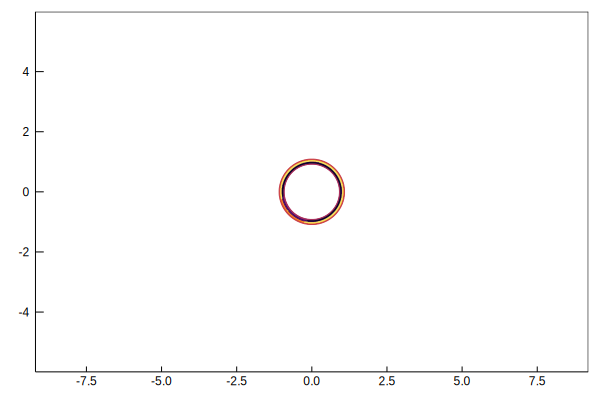

In [7]:
xg, yg = coordinates(w,g)
plot(xg,yg,real(dlayer(1)))

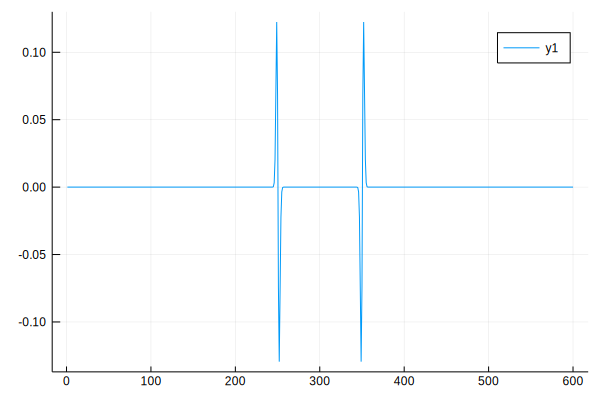

In [8]:
plot(real(dlayer(1))[301,:])

In [87]:
sum(slayer(1))-2π*radius

-0.00045934217251364373 + 0.0im

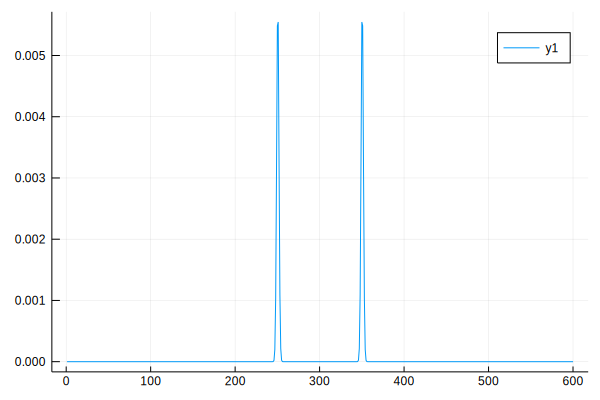

In [9]:
plot(real(slayer(1))[301,:])

In [17]:
inner = Layers.Mask(body,regop,w)
outer = Layers.ComplementaryMask(inner)

ComplementaryMask{150,600,600,Dual}(Mask{150,600,600,Dual}(Dual nodes in a (nx = 600, ny = 600) cell grid of type Complex{Float64} data
  Number of Dual nodes: (nx = 600, ny = 600)))

In [12]:
sum(inner(w))*Δx^2-π

-0.000919549509568629 + 3.0624957001940574e-15im

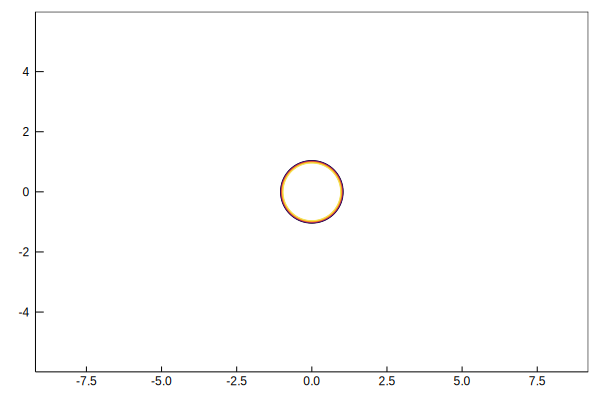

In [13]:
plot(xg,yg,real(inner(w)))

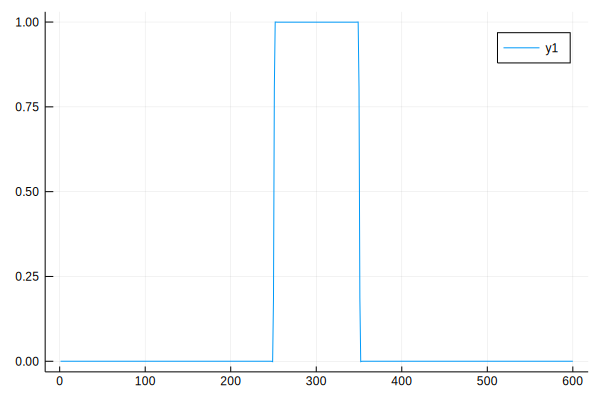

In [18]:
plot(real(inner(w))[:,301])

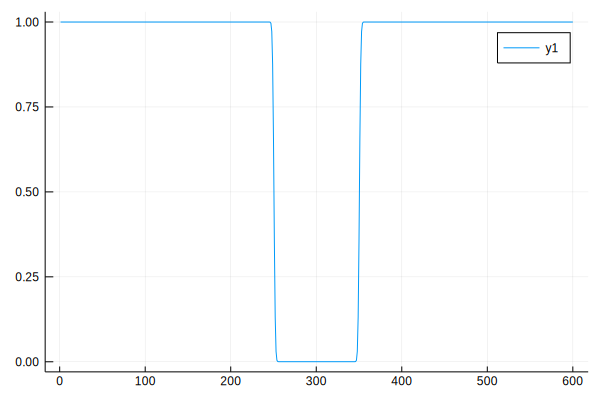

In [94]:
plot(real(outer(w))[301,:])

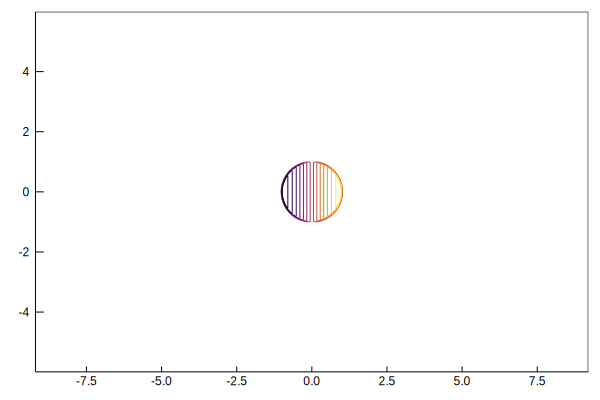

In [26]:
w .= sin.(xg)
plot(xg,yg,real(w))
plot(xg,yg,real(inner(w)))